In [405]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [406]:
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [407]:
data = pd.read_csv("fake_or_real_news.csv")

In [408]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Removing special characters
    text = re.sub(r'\W', ' ', text)

    # # Tokenization
    # words = word_tokenize(text)

    # # Removing Stop Words and Applying Stemming
    # stemmer = PorterStemmer()
    # words = [stemmer.stem(word) for word in words if word not in stopwords.words('english')]

    # # Joining Words
    # text = ' '.join(words)
    
    return text


In [409]:
# Assuming 'data' is your DataFrame and 'text' is the column with news articles
# data['text'] = data['text'].apply(preprocess_text)


In [410]:
data

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [411]:
data['fake'] = data['label'].apply(lambda x: 0 if x == "REAL" else 1)
data = data.drop("label", axis=1)

In [412]:
X, y = data["text"], data["fake"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

TF-IDF: Term Frequency - Inverse Document Frequency

A metric that indicates how important a word is to a document in a collection. It weighs the improtance of each word in a document based on how often it appears in that document and how often it appears accross all documents in the collection.

TF: Number of times a term t appears in a document
IDF: Logarithm of total number of documents divided by no. of docs that contain term
TF-IDF: TF * IDF

Basically allows us to find the most relevant and distinctive words per document.

In [413]:
# vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
vectorizer = TfidfVectorizer(stop_words='english', 
                             max_df=0.7,  # terms that appear in more than 70% of documents are ignored
                             min_df=3,    # terms that appear in less than 3 documents are ignored
                             ngram_range=(1, 3))  # unigrams and bigrams are considered
X_train_vectorized = vectorizer.fit_transform(X_train) 
X_test_vectorized = vectorizer.transform(X_test)

In [414]:
clf = LinearSVC()  # Linear SVC is considered one of the best text classification algorithms
clf.fit(X_train_vectorized, y_train)
clf.score(X_test_vectorized, y_test)

0.9423835832675612

In [415]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train_vectorized, y_train)
clf.score(X_test_vectorized, y_test)


0.8579321231254933

In [416]:
article_text = X_test.iloc[10]
vectorized_text = vectorizer.transform([article_text])

In [417]:
clf.predict(vectorized_text)

array([0], dtype=int64)

In [418]:
y_test.iloc[10]

0

In [419]:
# Generate a random index within the range of X_test
random_index = random.randint(0, len(X_test) - 1)

# Select a random article using the generated index
article_text = X_test.iloc[random_index]
vectorized_text = vectorizer.transform([article_text])

# Predict
predicted_value = clf.predict(vectorized_text)[0]

# Actual value
actual_value = y_test.iloc[random_index]

# Comparison and output
if predicted_value == actual_value:
    print("The answer is correct.")
else:
    print("The answer is incorrect.")



The answer is correct.


In [420]:
# Predict for the entire test set
predictions = clf.predict(X_test_vectorized)

# Convert predictions and actual labels to arrays for easier comparison
predictions_array = np.array(predictions)
actual_labels_array = y_test.to_numpy()

# Find indices where predictions and actual labels differ
mismatch_indices = np.where(predictions_array != actual_labels_array)[0]

# Print each mismatch with its index
for index in mismatch_indices:
    print(f"Index: {index}, Predicted: {predictions_array[index]}, Actual: {actual_labels_array[index]}")
    print(f"Text: {X_test.iloc[index]}\n")


Index: 2, Predicted: 0, Actual: 1
Text: Getty - Jemall Countess/Stringer The Wildfire is an opinion platform and any opinions or information put forth by contributors are exclusive to them and do not represent the views of IJR. 
Megyn Kelly is a bit of a hot commodity nowadays, though one might not be able to tell that from the ire she is drawing from Trump fans. 
The Week, and other publications, kicked up a media frenzy this summer by speculating that Megyn Kelly was leaving Fox News, much to the delight of her Trump-supporting detractors: 
Megyn Kelly's contract at Fox News will expire after the election, and the star anchor has publicly confessed that she doesn't know what's going to happen after that. “I've had a great 12 years here, and I really like working for Roger Ailes. I really like my show, and I love my team. But, you know, there's a lot of brain damage that comes from the job,” she told Variety this spring. Image Credit: Mike Coppola/Getty Images for People.com 
In an “e

In [421]:
# Predict for the entire test set
predictions = clf.predict(X_test_vectorized)

# Convert predictions and actual labels to arrays for easier comparison
predictions_array = np.array(predictions)
actual_labels_array = y_test.to_numpy()

# Initialize lists for false negatives and false positives
false_negatives = []
false_positives = []

# Iterate over the predictions and actual labels
for i in range(len(predictions_array)):
    if predictions_array[i] == 0 and actual_labels_array[i] == 1:
        # False Negative
        false_negatives.append(i)
    elif predictions_array[i] == 1 and actual_labels_array[i] == 0:
        # False Positive
        false_positives.append(i)

In [422]:
# Print False Negatives
print("False Negatives: ACTUALLY FAKE")
for index in false_negatives:
    print(f"Index: {index}, Text: {X_test.iloc[index]}")
    print()
    print()
    print()
    

False Negatives: ACTUALLY FAKE
Index: 2, Text: Getty - Jemall Countess/Stringer The Wildfire is an opinion platform and any opinions or information put forth by contributors are exclusive to them and do not represent the views of IJR. 
Megyn Kelly is a bit of a hot commodity nowadays, though one might not be able to tell that from the ire she is drawing from Trump fans. 
The Week, and other publications, kicked up a media frenzy this summer by speculating that Megyn Kelly was leaving Fox News, much to the delight of her Trump-supporting detractors: 
Megyn Kelly's contract at Fox News will expire after the election, and the star anchor has publicly confessed that she doesn't know what's going to happen after that. “I've had a great 12 years here, and I really like working for Roger Ailes. I really like my show, and I love my team. But, you know, there's a lot of brain damage that comes from the job,” she told Variety this spring. Image Credit: Mike Coppola/Getty Images for People.com 
I

In [423]:
# Print False Positives
print("\nFalse Positives: ACTUALLY REAL")
for index in false_positives:
    print(f"Index: {index}, Text: {X_test.iloc[index]}")
    print()
    print()
    print()


False Positives: ACTUALLY REAL
Index: 179, Text: Catherine R. Squires is a professor of communication studies at the University of Minnesota, Twin Cities. She is also the director of the Race, Indigeneity, Gender and Sexuality Studies Initiative.

Facebook is a for-profit company that makes money packaging its users' information to sell to advertisers and other entities. The company's goal is not to produce a "balanced" information diet for its users. People who are shocked that Facebook might be skewing their newsfeed probably shouldn't have trusted them with their news diet in the first place, given its history. Remember those confusing and ever-changing privacy settings, and that experiment to see whether users' moods could be manipulated by changing the newsfeed? This is not the company I'd trust to tell me what's important in the world.

But the uproar over the role of human editors at Facebook — or at least, in the "Trending Topics" section — does revive an important question: I

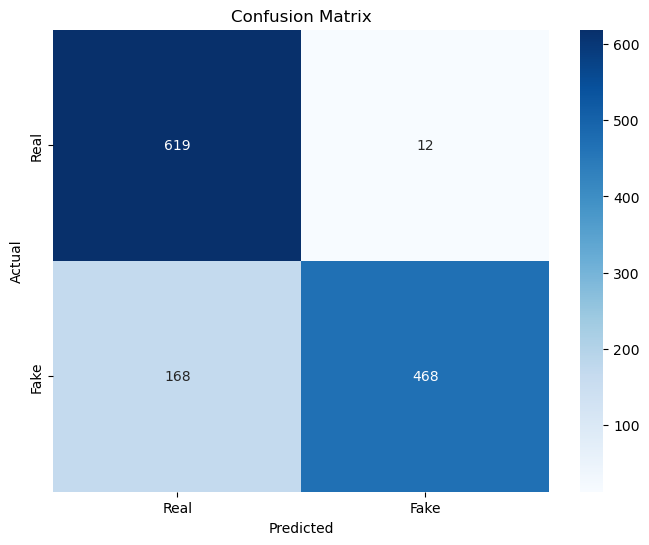

In [424]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
